# Í∞ÑÎã®Ìïú OpenCV ÌïÑÌÑ∞ Ï†ÅÏö©

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def apply_sepia(img):
    """
    Ïù¥ÎØ∏ÏßÄÏóê ÏÑ∏ÌîºÏïÑ ÌïÑÌÑ∞Î•º Ï†ÅÏö©
    
    Args:
        img: RGB Ïù¥ÎØ∏ÏßÄ
        
    Returns:
        ÏÑ∏ÌîºÏïÑ ÌïÑÌÑ∞Í∞Ä Ï†ÅÏö©Îêú Ïù¥ÎØ∏ÏßÄ
    """
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    return cv2.transform(img, sepia_filter)

def apply_grayscale(img):
    """
    Ïù¥ÎØ∏ÏßÄÎ•º Í∑∏Î†àÏù¥Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
    
    Args:
        img: RGB Ïù¥ÎØ∏ÏßÄ
        
    Returns:
        Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Ïù¥ÎØ∏ÏßÄ (1Ï±ÑÎÑê)
    """
    if len(img.shape) == 3:
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        return img

def apply_vintage(img):
    """
    Ïù¥ÎØ∏ÏßÄÏóê Í∞ïÌïú ÎπàÌã∞ÏßÄ ÌïÑÌÑ∞Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.
    
    Args:
        img: RGB Ïù¥ÎØ∏ÏßÄ
        
    Returns:
        ÎπàÌã∞ÏßÄ ÌïÑÌÑ∞Í∞Ä Ï†ÅÏö©Îêú Ïù¥ÎØ∏ÏßÄ
    """
    # 1. HSV Î≥ÄÌôò
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # 2. Ï±ÑÎèÑ ÎåÄÌè≠ Í∞êÏÜå (Îçî ÌùêÎ¶∞ ÏÉâÏÉÅ)
    img_hsv[:, :, 1] = img_hsv[:, :, 1] * 0.3
    
    # 3. Î™ÖÎèÑ Ï°∞Ï†ï (Ïñ¥Îë°Í≤å)
    img_hsv[:, :, 2] = img_hsv[:, :, 2] * 0.8
    
    # 4. ÏÉâÏ°∞ ÏïΩÍ∞Ñ Ï°∞Ï†ï (Îî∞ÎúªÌïú ÌÜ§)
    img_hsv[:, :, 0] = np.clip(img_hsv[:, :, 0] * 1.1, 0, 179)
    
    # 5. RGBÎ°ú Î≥ÄÌôò
    img_vintage = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    
    # 6. ÏÑ∏ÌîºÏïÑ ÌÜ§ Ï∂îÍ∞Ä
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    img_vintage = cv2.transform(img_vintage, sepia_filter)
    
    # 7. ÎåÄÎπÑ Í∞êÏÜå (ÌùêÎ¶øÌïú ÎäêÎÇå)
    img_vintage = cv2.convertScaleAbs(img_vintage, alpha=0.9, beta=10)
    
    # 8. ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä (Ïò§ÎûòÎêú ÏÇ¨ÏßÑ ÎäêÎÇå)
    noise = np.random.normal(0, 5, img_vintage.shape).astype(np.uint8)
    img_vintage = cv2.add(img_vintage, noise)
    
    # 9. ÏïΩÍ∞ÑÏùò Î∏îÎü¨ Ìö®Í≥º
    img_vintage = cv2.GaussianBlur(img_vintage, (3, 3), 0.5)
    
    
    return img_vintage

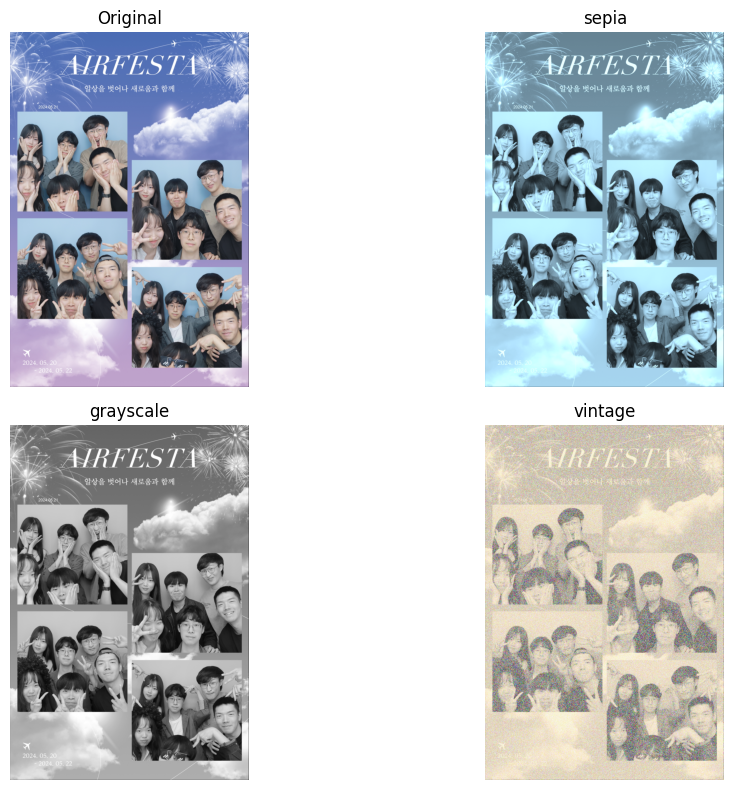

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Î°úÎìú (ÌååÏùºÏù¥ ÏóÜÎã§Î©¥ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±)
try:
    img = cv2.imread('input.jpg')
    if img is None:
        # ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
        img = np.random.randint(0, 255, (300, 400, 3), dtype=np.uint8)
        print("input.jpg ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    # ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
    img = np.random.randint(0, 255, (300, 400, 3), dtype=np.uint8)
    print("input.jpg ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.")

# ÌïÑÌÑ∞ Ï†ÅÏö©
img_sepia = apply_sepia(img)
img_grayscale = apply_grayscale(img)
img_vintage = apply_vintage(img)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_sepia)
axes[0, 1].set_title('sepia')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_grayscale, cmap='gray')
axes[1, 0].set_title('grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_vintage)
axes[1, 1].set_title('vintage')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÌíãÏúºÎ°ú Î∞õÏïÑ Í∞êÏ†ï Î∂ÑÎ•ò

Î∂ÑÏÑùÌï† Ïù¥ÎØ∏ÏßÄ: ['input.jpg']
Î∂ÑÏÑù Ï§ë: input.jpg


Action: emotion: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 26.81it/s]


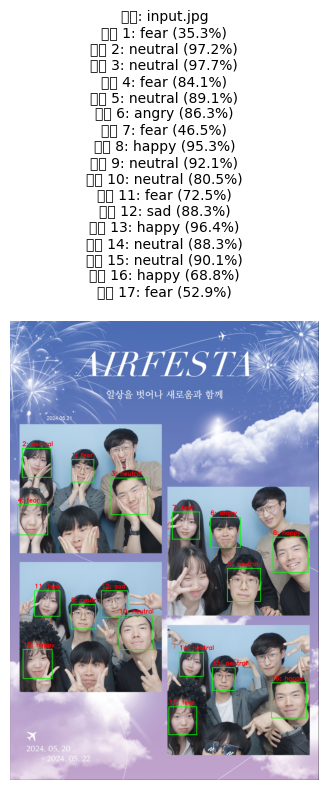


Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

üì∏ input.jpg:
  üë§ ÏñºÍµ¥ 1: fear (35.3%)
  üë§ ÏñºÍµ¥ 2: neutral (97.2%)
  üë§ ÏñºÍµ¥ 3: neutral (97.7%)
  üë§ ÏñºÍµ¥ 4: fear (84.1%)
  üë§ ÏñºÍµ¥ 5: neutral (89.1%)
  üë§ ÏñºÍµ¥ 6: angry (86.3%)
  üë§ ÏñºÍµ¥ 7: fear (46.5%)
  üë§ ÏñºÍµ¥ 8: happy (95.3%)
  üë§ ÏñºÍµ¥ 9: neutral (92.1%)
  üë§ ÏñºÍµ¥ 10: neutral (80.5%)
  üë§ ÏñºÍµ¥ 11: fear (72.5%)
  üë§ ÏñºÍµ¥ 12: sad (88.3%)
  üë§ ÏñºÍµ¥ 13: happy (96.4%)
  üë§ ÏñºÍµ¥ 14: neutral (88.3%)
  üë§ ÏñºÍµ¥ 15: neutral (90.1%)
  üë§ ÏñºÍµ¥ 16: happy (68.8%)
  üë§ ÏñºÍµ¥ 17: fear (52.9%)

üìä Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:
  Ï¥ù Í∞êÏßÄÎêú ÏñºÍµ¥ Ïàò: 17
  Í∞êÏ†ï Î∂ÑÌè¨:
    angry: 1Î™Ö (5.9%)
    fear: 5Î™Ö (29.4%)
    happy: 3Î™Ö (17.6%)
    sad: 1Î™Ö (5.9%)
    neutral: 7Î™Ö (41.2%)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

class EmotionAnalyzer:
    def __init__(self):
        """
        Í∞êÏ†ï Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
        """
        self.emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        self.emotion_korean = {
            'angry': 'ÌôîÎÇ®',
            'disgust': 'Ïó≠Í≤®ÏõÄ',
            'fear': 'ÎëêÎ†§ÏõÄ',
            'happy': 'ÌñâÎ≥µ',
            'sad': 'Ïä¨Ìîî',
            'surprise': 'ÎÜÄÎûå',
            'neutral': 'Î¨¥ÌëúÏ†ï'
        }
    
    def analyze_emotion(self, image_path):
        """
        Îã®Ïùº Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞êÏ†ïÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.
        Args:
            image_path: Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°ú
        Returns:
            Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨ (bounding box Ìè¨Ìï®)
        """
        try:
            # DeepFaceÎ•º ÏÇ¨Ïö©Ìïú Í∞êÏ†ï Î∂ÑÏÑù
            result = DeepFace.analyze(image_path, 
                                    actions=['emotion'],
                                    enforce_detection=False)
            # Í≤∞Í≥º Ï≤òÎ¶¨
            if isinstance(result, list):
                # Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ Í∞êÏßÄÎêú Í≤ΩÏö∞
                emotions = []
                for face_result in result:
                    emotion = face_result['dominant_emotion']
                    confidence = face_result['emotion'][emotion]
                    # bounding box Ï†ïÎ≥¥ Ï∂îÍ∞Ä (x, y, w, h)
                    region = face_result.get('region', None)
                    if region:
                        x, y, w, h = region['x'], region['y'], region['w'], region['h']
                    else:
                        x, y, w, h = None, None, None, None
                    emotions.append({
                        'emotion': emotion,
                        'confidence': confidence,
                        'box': (x, y, w, h)
                    })
                return emotions
            else:
                # Îã®Ïùº ÏñºÍµ¥Ïù¥ Í∞êÏßÄÎêú Í≤ΩÏö∞
                emotion = result['dominant_emotion']
                confidence = result['emotion'][emotion]
                region = result.get('region', None)
                if region:
                    x, y, w, h = region['x'], region['y'], region['w'], region['h']
                else:
                    x, y, w, h = None, None, None, None
                return [{
                    'emotion': emotion,
                    'confidence': confidence,
                    'box': (x, y, w, h)
                }]
        except Exception as e:
            print(f"Í∞êÏ†ï Î∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
            return []
    
    def analyze_multiple_images(self, image_paths):
        """
        Ïó¨Îü¨ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞êÏ†ïÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.
        
        Args:
            image_paths: Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
            
        Returns:
            Í∞Å Ïù¥ÎØ∏ÏßÄÎ≥Ñ Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º
        """
        results = {}
        
        for image_path in image_paths:
            if os.path.exists(image_path):
                print(f"Î∂ÑÏÑù Ï§ë: {image_path}")
                emotions = self.analyze_emotion(image_path)
                results[image_path] = emotions
            else:
                print(f"ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {image_path}")
                results[image_path] = []
        
        return results
    
    def visualize_results(self, results):
        """
        Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
        Args:
            results: Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨
        """
        if not results:
            print("ÏãúÍ∞ÅÌôîÌï† Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")
            return
        
        # Í≤∞Í≥º Í∞úÏàòÏóê Îî∞Îùº ÏÑúÎ∏åÌîåÎ°Ø ÌÅ¨Í∏∞ Í≤∞Ï†ï
        n_images = len(results)
        # Í∞Å Ïù¥ÎØ∏ÏßÄÎßàÎã§ 2Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø (Ïù¥ÎØ∏ÏßÄ + Í∞êÏ†ï Î¶¨Ïä§Ìä∏)
        cols = 2  # Ìï≠ÏÉÅ 2Ïó¥ (Ïù¥ÎØ∏ÏßÄ + Í∞êÏ†ï Î¶¨Ïä§Ìä∏)
        rows = n_images
        
        # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Îçî ÌÅ¨Í≤å ÏÑ§Ï†ï
        fig, axes = plt.subplots(rows, cols, figsize=(20, 8*rows))
        if n_images == 1:
            axes = axes.reshape(1, -1)
        
        # ÏÑúÎ∏åÌîåÎ°Ø Í∞ÑÍ≤© Ï°∞Ï†ï
        plt.subplots_adjust(wspace=0.1)  # ÏÑúÎ∏åÌîåÎ°Ø Í∞Ñ Í∞ÄÎ°ú Í∞ÑÍ≤© Ï§ÑÏù¥Í∏∞
        
        for idx, (image_path, emotions) in enumerate(results.items()):
            if idx >= rows:
                break
            
            # ÏôºÏ™Ω ÏÑúÎ∏åÌîåÎ°Ø: Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
            img = cv2.imread(image_path)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # ÏñºÍµ¥ Î≤àÌò∏ÏôÄ Í∞êÏ†ïÎ™Ö ÌëúÏãú
                if emotions:
                    for i, emotion_data in enumerate(emotions):
                        box = emotion_data.get('box', (None, None, None, None))
                        x, y, w, h = box
                        if None not in box:
                            # ÏÇ¨Í∞ÅÌòï Í∑∏Î¶¨Í∏∞
                            cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
                            # Î≤àÌò∏+Í∞êÏ†ïÎ™Ö ÎùºÎ≤® (Î∞îÏö¥Îî© Î∞ïÏä§ ÏúÑÏóê ÌëúÏãú)
                            label = f"{i+1}: {emotion_data['emotion']}"
                            # ÎùºÎ≤®ÏùÑ ÏñºÍµ¥ ÏÇ¨Í∞ÅÌòï ÏúÑÏ™ΩÏóê Î∞∞Ïπò
                            label_x = x
                            label_y = y - 10  # ÏÇ¨Í∞ÅÌòï ÏúÑÏ™ΩÏóêÏÑú 10ÌîΩÏÖÄ Îñ®Ïñ¥ÏßÑ ÏúÑÏπò
                            cv2.putText(img_rgb, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
                
                axes[idx, 0].imshow(img_rgb)
                axes[idx, 0].axis('off')
            else:
                axes[idx, 0].text(0.5, 0.5, f"Ïù¥ÎØ∏ÏßÄÎ•º Î°úÎìúÌï† Ïàò ÏóÜÏäµÎãàÎã§:\n{os.path.basename(image_path)}", 
                                 ha='center', va='center', transform=axes[idx, 0].transAxes)
                axes[idx, 0].axis('off')
            
            # Ïò§Î•∏Ï™Ω ÏÑúÎ∏åÌîåÎ°Ø: Í∞êÏ†ï Î¶¨Ïä§Ìä∏ ÌëúÏãú
            axes[idx, 1].axis('off')
            if emotions:
                # Í∞êÏ†ï Î¶¨Ïä§Ìä∏Î•º ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
                emotion_text = f"result :\n\n"
                for i, emotion_data in enumerate(emotions):
                    emotion_text += f"face {i+1}: {emotion_data['emotion']} ({emotion_data['confidence']:.1f}%)\n"
                
                axes[idx, 1].text(0.1, 0.9, emotion_text, transform=axes[idx, 1].transAxes, 
                                 fontsize=12, va='top', 
                                 bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
            else:
                axes[idx, 1].text(0.5, 0.5, "ÏñºÍµ¥ÏùÑ Í∞êÏßÄÌï† Ïàò ÏóÜÏäµÎãàÎã§.", 
                                 ha='center', va='center', transform=axes[idx, 1].transAxes,
                                 fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
    
    def print_summary(self, results):
        """
        Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
        
        Args:
            results: Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨
        """
        print("\n" + "="*50)
        print("Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ")
        print("="*50)
        
        total_faces = 0
        emotion_counts = {emotion: 0 for emotion in self.emotions}
        
        for image_path, emotions in results.items():
            print(f"\nüì∏ {os.path.basename(image_path)}:")
            
            if emotions:
                for i, emotion_data in enumerate(emotions):
                    emotion = emotion_data['emotion']
                    confidence = emotion_data['confidence']
                    
                    print(f"  ÏñºÍµ¥ {i+1}: {emotion} ({confidence:.1f}%)")
                    emotion_counts[emotion] += 1
                    total_faces += 1
            else:
                print("  ‚ùå ÏñºÍµ¥ÏùÑ Í∞êÏßÄÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
        
        # Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ
        print(f"\nüìä Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:")
        print(f"  Ï¥ù Í∞êÏßÄÎêú ÏñºÍµ¥ Ïàò: {total_faces}")
        
        if total_faces > 0:
            print("  Í∞êÏ†ï Î∂ÑÌè¨:")
            for emotion in self.emotions:
                if emotion_counts[emotion] > 0:
                    percentage = (emotion_counts[emotion] / total_faces) * 100
                    print(f"    {emotion}: {emotion_counts[emotion]}Î™Ö ({percentage:.1f}%)")

def main():
    """
    Î©îÏù∏ Ìï®Ïàò - ÏòàÏ†ú Ïã§Ìñâ
    """
    analyzer = EmotionAnalyzer()
    
    # ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ (Ïã§Ï†ú ÌååÏùº Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî)
    test_images = [
        'input.jpg',  # Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω
        # 'person1.jpg',
        # 'person2.jpg',
        # 'group_photo.jpg'
    ]
    
    # Ï°¥Ïû¨ÌïòÎäî ÌååÏùºÎßå ÌïÑÌÑ∞ÎßÅ
    existing_images = [img for img in test_images if os.path.exists(img)]
    
    if not existing_images:
        print("Î∂ÑÏÑùÌï† Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ ÏóÜÏäµÎãàÎã§.")
        print("ÌÖåÏä§Ìä∏Î•º ÏúÑÌï¥ ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
        
        # ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
        sample_image = np.random.randint(0, 255, (300, 400, 3), dtype=np.uint8)
        cv2.imwrite('sample_face.jpg', sample_image)
        existing_images = ['sample_face.jpg']
    
    print(f"Î∂ÑÏÑùÌï† Ïù¥ÎØ∏ÏßÄ: {existing_images}")
    
    # Í∞êÏ†ï Î∂ÑÏÑù Ïã§Ìñâ
    results = analyzer.analyze_multiple_images(existing_images)
    
    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    analyzer.visualize_results(results)
    
    # Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
    analyzer.print_summary(results)

if __name__ == "__main__":
    main() 